## DATA CLEANING

                                                Summary of Data Cleaning 
Data cleaning is the process of correcting or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data from a dataset. This step is crucial for ensuring the accuracy and reliability of your project's outcomes and analyses. Here's a general framework for cleaning your data:

Remove Duplicate or Irrelevant Observations: 
      Identify and eliminate duplicate entries and any data points that are not relevant to your project's focus. This step helps to streamline your dataset, making it more manageable and focused.

Fix Structural Errors: 
    Correct inconsistencies such as strange naming conventions, typos, and incorrect capitalization. Standardizing these elements helps ensure your data is consistent and accurately labeled.

Filter Unwanted Outliers: 
    Look for data points that do not fit with the rest of your data. Determine if these outliers are errors or legitimate observations. If they are mistakes or irrelevant, consider removing them to improve your analysis.

Handle Missing Data: 
    Address missing values by either:
    Removing observations with missing data, though this can lead to loss of information.
    Imputing missing values based on other observations, which involves making educated guesses that might introduce some assumptions.
    Adjusting your analysis to work around the missing data without imputing or removing it.

Validate and QA: After cleaning your data, check to ensure:
The data makes sense and follows the appropriate rules.
    It supports or challenges your initial hypotheses.
    It reveals any trends or insights relevant to your project.
    If any issues arise, determine if they are due to data quality problems.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset excel sheet
df = pd.read_excel('Movie sarcasm Final Dataset.xlsx')
df

,Review,Sentiment,Sarcasm
0,One of the other reviewers has mentioned that ...,Positive,Non-Sarcastic
1,A wonderful little production. <br /><br />The...,Positive,Non-Sarcastic
2,This movie was a groundbreaking experience!<br...,Positive,Sarcastic
3,I thought this was a wonderful way to spend ti...,Positive,Non-Sarcastic
4,Basically there's a family where a little boy ...,Negative,Sarcastic
...,...,...,...
6539,This movie's idea of character development is ...,Negative,Sarcastic
6540,I guess they ran out of budget for a decent sc...,Negative,Sarcastic
6541,Who needs a plot when you have explosions ever...,Negative,Sarcastic
6542,Is there an award for most generic action movi...,Negative,Sarcastic


In [3]:
# The size of the dataset 
df.shape
rows=df.shape[0]
print(f"no.of datapoints {rows}")

no.of datapoints 6544


## working on labels columns

In [4]:
df[['Sarcasm', 'Sentiment']]
df['Sarcasm'] = df['Sarcasm'].str.lower()
df['Sentiment'] = df['Sentiment'].str.lower()

In [5]:
(df[['Sarcasm', 'Sentiment']])

,Sarcasm,Sentiment
0,non-sarcastic,positive
1,non-sarcastic,positive
2,sarcastic,positive
3,non-sarcastic,positive
4,sarcastic,negative
...,...,...
6539,sarcastic,negative
6540,sarcastic,negative
6541,sarcastic,negative
6542,sarcastic,negative


In [6]:
# replacing all the labels to sarcastic and not sarcastic
df['Sarcasm'] = df['Sarcasm'].replace({
    'sarcasm': 'sarcastic',
    'saracstic': 'sarcastic',
    'not sarcasm': 'not sarcastic'
})
df.Sarcasm

0       non-sarcastic
1       non-sarcastic
2           sarcastic
3       non-sarcastic
4           sarcastic
            ...      
6539        sarcastic
6540        sarcastic
6541        sarcastic
6542        sarcastic
6543        sarcastic
Name: Sarcasm, Length: 6544, dtype: object

## removing the duplicate reviews in the dataset

In [7]:
df = df.drop_duplicates(subset='Review' , keep ='first')
df
finalrows = df.shape[0]
print(f"no.of rows dropped {rows-finalrows}") 
print(df.shape)

no.of rows dropped 34
(6510, 3)


## analysis on dataset 

In [14]:
# analysis on no.of reviews on each category
sarcastic_reviews = df['Sarcasm'].value_counts().get('sarcastic', 0)
not_sarcastic_reviews = df['Sarcasm'].value_counts().get('not sarcastic', 0)

print(f"Number of sarcastic labels: {sarcastic_reviews}")
print(f"Number of not sarcastic labels: {not_sarcastic_reviews}")

positive_reviews = df['Sentiment'].value_counts().get('positive', 0)
negative_reviews = df['Sentiment'].value_counts().get('negative', 0)

print(f"Number of positive reviews: {positive_reviews}")
print(f"Number of negative reviews: {negative_reviews}")


Number of sarcastic labels: 3517
Number of not sarcastic labels: 2039
Number of positive reviews: 2306
Number of negative reviews: 4187


Percentage of reviews:
Sarcastic and Positive: 5.3%
Sarcastic and Negative: 48.5%
Not Sarcastic and Positive: 18.7%
Not Sarcastic and Negative: 12.6%


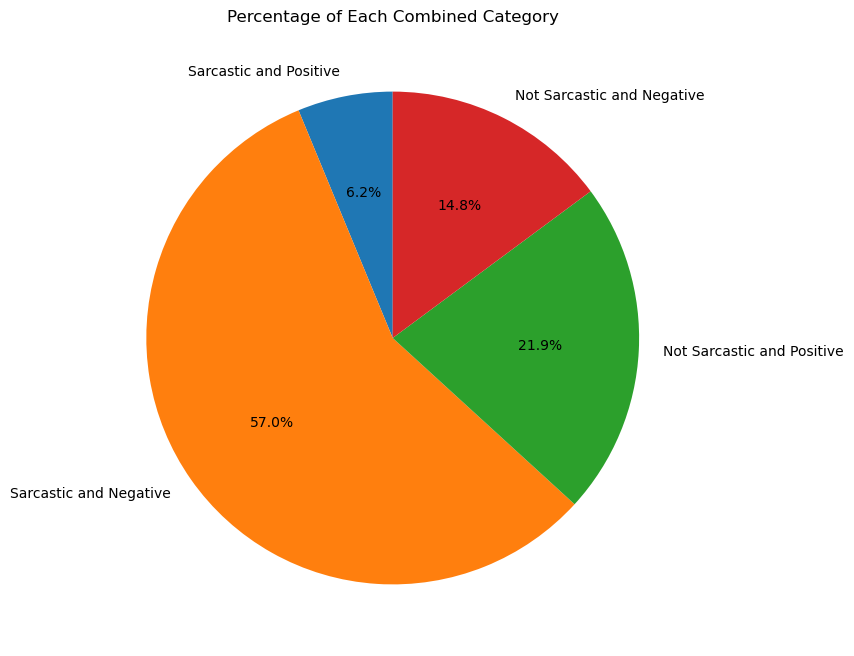

In [9]:
# calculating the percentages of different categories
# categories considered 1)positive_sarcastic 2)negative_sarcastic 3)positive_non_sarcastic 4)negative_non_sarcastic

# Calculate percentages
total_reviews = len(df)
sarcastic_positive_percentage = (df[(df['Sarcasm'] == 'sarcastic') & (df['Sentiment'] == 'positive')].shape[0] / total_reviews) * 100
sarcastic_negative_percentage = (df[(df['Sarcasm'] == 'sarcastic') & (df['Sentiment'] == 'negative')].shape[0] / total_reviews) * 100
non_sarcastic_positive_percentage = (df[(df['Sarcasm'] == 'not sarcastic') & (df['Sentiment'] == 'positive')].shape[0] / total_reviews) * 100
non_sarcastic_negative_percentage = (df[(df['Sarcasm'] == 'not sarcastic') & (df['Sentiment'] == 'negative')].shape[0] / total_reviews) * 100

# Print the percentages
print("Percentage of reviews:")
print(f"Sarcastic and Positive: {sarcastic_positive_percentage:.1f}%")
print(f"Sarcastic and Negative: {sarcastic_negative_percentage:.1f}%")
print(f"Not Sarcastic and Positive: {non_sarcastic_positive_percentage:.1f}%")
print(f"Not Sarcastic and Negative: {non_sarcastic_negative_percentage:.1f}%")

# Plot the pie chart
labels = ['Sarcastic and Positive', 'Sarcastic and Negative', 'Not Sarcastic and Positive', 'Not Sarcastic and Negative']
sizes = [sarcastic_positive_percentage, sarcastic_negative_percentage, non_sarcastic_positive_percentage, non_sarcastic_negative_percentage]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Each Combined Category')
plt.show()


In [10]:
# finding the average length of review in the dataset
avg_length = df['Review'].str.len().mean()
avg_length

655.8513056835637

## cleaning the reviews section

removing the punctuation marks except ! ' . 

In [11]:
import string
def remove_punctuation(text):
    # Define the punctuation marks to keep
    keep = ['?', '!', '.',]
    punctuation_to_remove = ''.join(p for p in string.punctuation if p not in keep)
    translation_table = str.maketrans('', '', punctuation_to_remove)
    return text.translate(translation_table)

# Apply the function to the 'cleaned_data' column
df['cleaned_data'] = df['Review'].apply(remove_punctuation)
df.cleaned_data

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11328\3466637572.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_data'] = df['Review'].apply(remove_punctuation)


0       One of the other reviewers has mentioned that ...
1       A wonderful little production. br br The filmi...
2       This movie was a groundbreaking experience!br ...
3       I thought this was a wonderful way to spend ti...
4       Basically theres a family where a little boy J...
                              ...                        
6539    This movies idea of character development is m...
6540    I guess they ran out of budget for a decent sc...
6541    Who needs a plot when you have explosions ever...
6542    Is there an award for most generic action movi...
6543             Two hours of nonstop mindnumbing action.
Name: cleaned_data, Length: 6510, dtype: object

In [12]:
df

,Review,Sentiment,Sarcasm,cleaned_data
0,One of the other reviewers has mentioned that ...,positive,non-sarcastic,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,non-sarcastic,A wonderful little production. br br The filmi...
2,This movie was a groundbreaking experience!<br...,positive,sarcastic,This movie was a groundbreaking experience!br ...
3,I thought this was a wonderful way to spend ti...,positive,non-sarcastic,I thought this was a wonderful way to spend ti...
4,Basically there's a family where a little boy ...,negative,sarcastic,Basically theres a family where a little boy J...
...,...,...,...,...
6539,This movie's idea of character development is ...,negative,sarcastic,This movies idea of character development is m...
6540,I guess they ran out of budget for a decent sc...,negative,sarcastic,I guess they ran out of budget for a decent sc...
6541,Who needs a plot when you have explosions ever...,negative,sarcastic,Who needs a plot when you have explosions ever...
6542,Is there an award for most generic action movi...,negative,sarcastic,Is there an award for most generic action movi...


creating the excel sheet with cleaned dataset

In [13]:
df_new = pd.read_excel('Cleaned_Dataset.xlsx')
df_new['cleaned_data'] = df['cleaned_data']
df_new['Sentiment'] = df['Sentiment']
df_new['Sarcasm'] = df['Sarcasm']
df_new.to_excel('Cleaned new Dataset.xlsx', index=False)
df_new

,cleaned_data,Sentiment,Sarcasm
0,One of the other reviewers has mentioned that ...,positive,non-sarcastic
1,A wonderful little production. br br The filmi...,positive,non-sarcastic
2,This movie was a groundbreaking experience!br ...,positive,sarcastic
3,I thought this was a wonderful way to spend ti...,positive,non-sarcastic
4,Basically theres a family where a little boy J...,negative,sarcastic
...,...,...,...
6539,This movies idea of character development is m...,negative,sarcastic
6540,I guess they ran out of budget for a decent sc...,negative,sarcastic
6541,Who needs a plot when you have explosions ever...,negative,sarcastic
6542,Is there an award for most generic action movi...,negative,sarcastic
